In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
df= pd.read_csv('house_prices_dataset.csv')

In [11]:
df

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248,3,92,23,200374
1,1931,2,22,14,268785
2,2324,6,33,22,315021
3,2762,3,63,10,355111
4,1883,7,54,25,234197
...,...,...,...,...,...
9995,2651,7,9,18,431344
9996,1001,2,53,24,6650
9997,1647,5,80,2,233698
9998,2248,6,73,28,280767


In [33]:
X = df.drop('price', axis=1)

In [34]:
y = df['price']

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def explain_model1(model, X_train, X_test, y_train, y_test, features=None):
    print('Test Results:')
    y_pred_test = model.predict(X_test)
    print(f'R² Score: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.4f}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test):.4f}')
    print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')

    print('\nTrain Results:')
    y_pred_train = model.predict(X_train)
    print(f'R² Score: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train):.4f}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train):.4f}')
    print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}')

    print('\n')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
model = GradientBoostingRegressor(n_estimators=2, learning_rate=1)

In [39]:
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=2)

In [40]:
explain_model1(model, X_train, X_test, y_train, y_test)

Test Results:
R² Score: 0.8076
Mean Absolute Error (MAE): 34326.1586
Mean Squared Error (MSE): 1861715822.8650
Root Mean Squared Error (RMSE): 43147.6051

Train Results:
R² Score: 0.8191
Mean Absolute Error (MAE): 33416.8098
Mean Squared Error (MSE): 1748399028.1243
Root Mean Squared Error (RMSE): 41813.8617




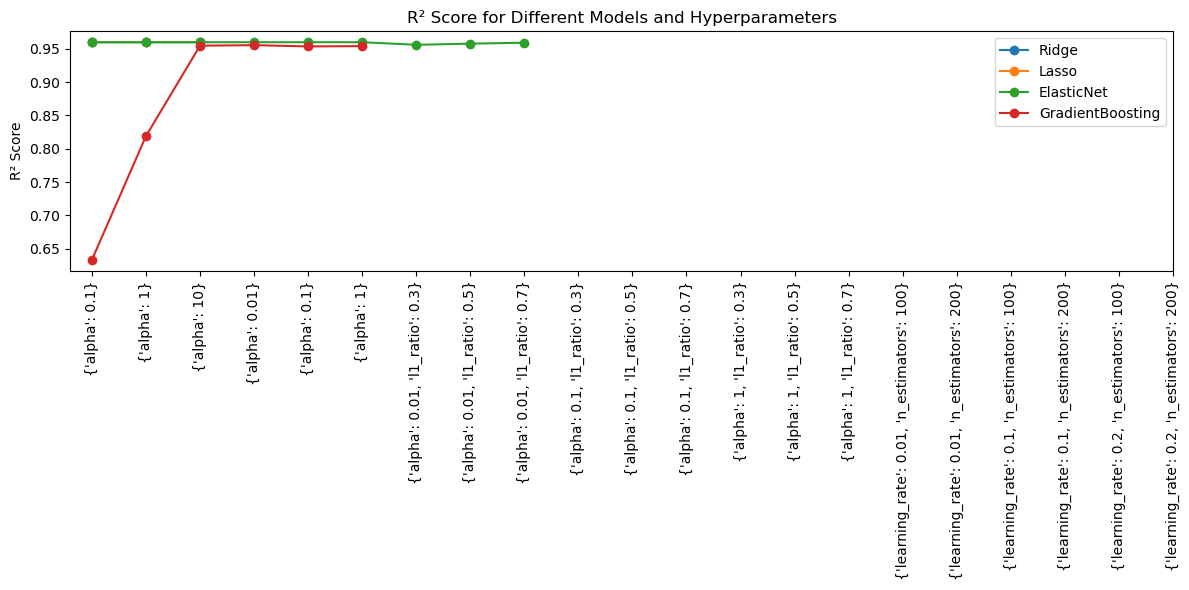

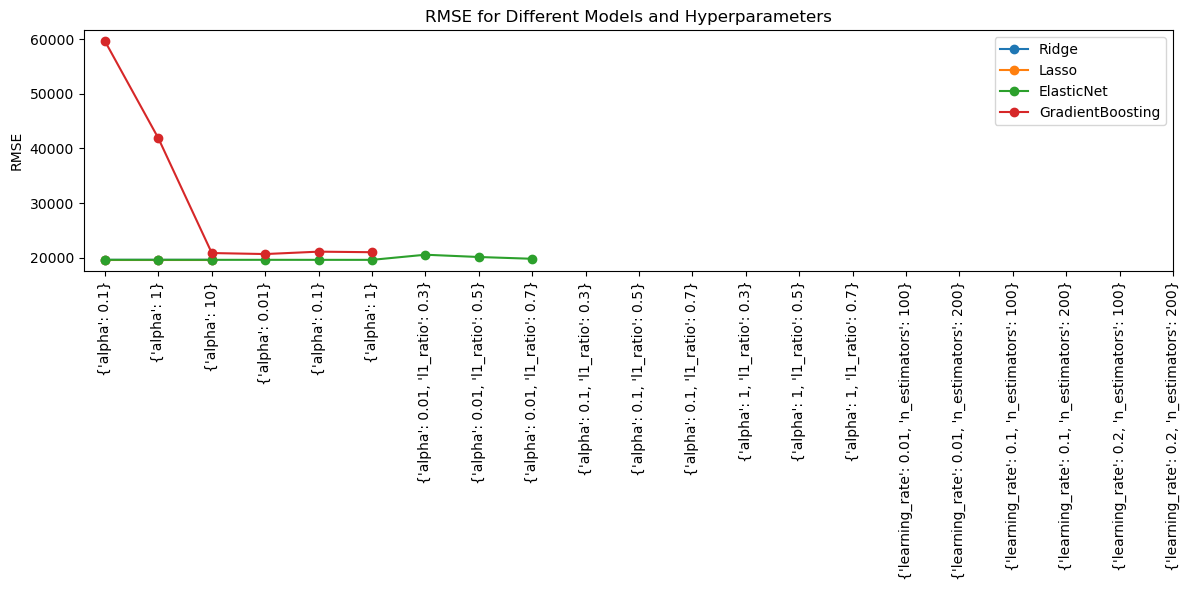

In [42]:
# Define models and hyperparameters
from sklearn.linear_model import Ridge, Lasso, ElasticNet
models = {
    "Ridge": {"estimator": Ridge, "params": {"alpha": [0.1, 1, 10]}},
    "Lasso": {"estimator": Lasso, "params": {"alpha": [0.01, 0.1, 1]}},
    "ElasticNet": {"estimator": ElasticNet, "params": {"alpha": [0.01, 0.1, 1], "l1_ratio": [0.3, 0.5, 0.7]}},
    "GradientBoosting": {"estimator": GradientBoostingRegressor, "params": {"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100, 200]}}
}

results = []

# Loop over models and hyperparameters
for name, spec in models.items():
    Estimator = spec["estimator"]
    param_grid = spec["params"]
    
    # Enumerate all combinations of hyperparameters
    import itertools
    keys, values = zip(*param_grid.items())
    for v in itertools.product(*values):
        params = dict(zip(keys, v))
        model = Estimator(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append({
            "model": name,
            "params": params,
            "R2": r2,
            "RMSE": rmse
        })

# Convert to structured array for plotting
import pandas as pd
df_results = pd.DataFrame(results)

# Plot R² scores
plt.figure(figsize=(12, 6))
for name in df_results['model'].unique():
    subset = df_results[df_results['model'] == name]
    plt.plot(range(len(subset)), subset['R2'], marker='o', label=name)
plt.xticks(range(len(df_results)), [str(p) for p in df_results['params']], rotation=90)
plt.ylabel("R² Score")
plt.title("R² Score for Different Models and Hyperparameters")
plt.legend()
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
for name in df_results['model'].unique():
    subset = df_results[df_results['model'] == name]
    plt.plot(range(len(subset)), subset['RMSE'], marker='o', label=name)
plt.xticks(range(len(df_results)), [str(p) for p in df_results['params']], rotation=90)
plt.ylabel("RMSE")
plt.title("RMSE for Different Models and Hyperparameters")
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
# Find the best model by R² (higher is better)
best_idx = df_results['R2'].idxmax()
best_model_info = df_results.loc[best_idx]

print("Best Model:")
print(f"Model: {best_model_info['model']}")
print(f"Hyperparameters: {best_model_info['params']}")
print(f"R² Score: {best_model_info['R2']:.4f}")
print(f"RMSE: {best_model_info['RMSE']:.4f}")


Best Model:
Model: ElasticNet
Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.7}
R² Score: 0.9601
RMSE: 19655.2658


In [47]:
explain_model1(model.estimators_[0][0], X_train, X_test, y_train, y_test)

Test Results:
R² Score: -6.4539
Mean Absolute Error (MAE): 262118.2556
Mean Squared Error (MSE): 72127433752.7675
Root Mean Squared Error (RMSE): 268565.5111

Train Results:
R² Score: -6.5421
Mean Absolute Error (MAE): 263486.2664
Mean Squared Error (MSE): 72903296417.3023
Root Mean Squared Error (RMSE): 270006.1044




C:\Users\ufml\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\ufml\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [74]:
df2 = pd.read_csv('heart_cleveland.csv')

In [75]:
X = df2.drop('condition', axis = 1)
y = df2['condition']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 50, random_state = 42)

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
modelcl = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01)

In [79]:
modelcl.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=10)

In [80]:
def explain_model(model,  X_train, X_test, y_train, y_test, features = None):
    print('Test Results:')
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))
    print(confusion_matrix(y_pred, y_test))
    print('Train Results:')
    y_pred_tr = model.predict(X_train)
    print(classification_report(y_pred_tr, y_train))
    print(confusion_matrix(y_pred_tr, y_train))
    print('------------------')
    print('------------------')
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              filled=True,
              feature_names = features,
              class_names=True,
              rounded=True,
              fontsize=10)
    plt.title("Visualization", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

In [81]:
explain_model(modelcl, X_train, X_test, y_train, y_test)

Test Results:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.62      0.81      0.70        16

    accuracy                           0.78        50
   macro avg       0.76      0.79      0.76        50
weighted avg       0.81      0.78      0.79        50

[[26  8]
 [ 3 13]]
Train Results:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       176
           1       0.59      0.96      0.73        71

    accuracy                           0.79       247
   macro avg       0.78      0.84      0.78       247
weighted avg       0.86      0.79      0.80       247

[[128  48]
 [  3  68]]
------------------
------------------


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got GradientBoostingClassifier(learning_rate=0.01, n_estimators=10) instead.

<Figure size 2000x1000 with 0 Axes>